In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import parallel_coordinates
from itertools import cycle,islice

# Introduction

This notebook was created to analyze the match data from The Larner College of Medicine at The University of Vermont for the years 2011, 2012, 2014, 2015, 2016, 2017, 2019, and 2019. These data are publically available on the UVM College of Medicine website (http://www.med.uvm.edu/studentservices/careerplanning/matchlists).

Briefly, 'The Match' is the final outcome of a proprietary algorithm owned and operated by the National Resident Matching Program. This algorithm integrates student's rank lists and residency program rank lists into an optimal outcome and designates each student to a program.

In March, medical students across the United States discover where they will be attending residency (a quite exciting day for everybody!). 

The purpose of this notebook is to analyze the class data and their match outcomes.

In [2]:
#read cleaned data
data_path = './data/specialties_cleaned.csv'
df = pd.read_csv(data_path)

The data table contains columns of student class year, the specialty they matched into, and the number of students that matched into that specialty that match cycle.

In [3]:
df.head()

,year,specialty,num_students
0,2019,Anesthesiology,4
1,2019,Child Neurology,1
2,2019,Dermatology,2
3,2019,Diagnostic Radiology,5
4,2019,Emergency Medicine,12


Range for years is 2011-2019 as expected and the average number of students matching to a specialty is about 5, although this is certainly not an even distribution. 

In [4]:
df.describe()

,year,num_students
count,191.000000,191.000000
mean,2015.445026,4.989529
std,2.580466,4.779330
min,2011.000000,1.000000
25%,2014.000000,1.000000
50%,2016.000000,3.000000
75%,2018.000000,7.000000
max,2019.000000,21.000000


## 1. Number of students matching each year

The following cell contains the number of students that matched each year. These numbers are skewed by outlier preliminary year students. Some residency programs require that students do a preliminary year in medicine or surgery. Students who match to a preliminary year and a main program will be ranked twice.

In [5]:
df.groupby('year').num_students.sum()

year
2011    118
2012    128
2014    106
2015    121
2016    119
2017    125
2018    122
2019    114
Name: num_students, dtype: int64

In [6]:
df.specialty.unique()

array(['Anesthesiology', 'Child Neurology', 'Dermatology',
       'Diagnostic Radiology', 'Emergency Medicine', 'Family Medicine',
       'Internal Medicine', 'Medicine/Emergency Med', 'Neurology',
       'Neurosurgery', 'Obstetrics & Gynecology', 'Ophthalmology',
       'Orthopaedic Surgery', 'Otolaryngology', 'Pathology', 'Pediatrics',
       'Peds/Psych/Child Psych', 'Physical Med & Rehabilitation',
       'Plastic Surgery', 'Psychiatry', 'Radiation Oncology',
       'Thoracic Surgery', 'Urology', 'Preliminary Medicine',
       'Preliminary Surgery', 'Transitional Year', 'Military',
       'EM/Anesthesiology', 'General Surgery', 'Gen Surgery/Research',
       'Medicine/Emergency Medicine', 'Preliminary Pediatrics',
       'Combined Adult/Child Psychiatry', 'Neurological Surgery',
       'Peds/Adult/Child Psychiatry', 'Primary Medicine', 'Med/EM',
       'Med/Peds', 'Primary Med/Social Int Med',
       'Neurodevel Disabilities', 'Primary Peds/Comm Health',
       'Physical Med & Reha

With prelim year students removed, the numbers look more correct.

In [7]:
no_prelims = df[df.specialty.str.contains('Preliminary') == False]
no_prelims.groupby('year').num_students.sum()

year
2011    110
2012    115
2014    106
2015    114
2016    109
2017    106
2018    111
2019    102
Name: num_students, dtype: int64

### The number of students that match each year has been about the same over the course of this data set.

Text(0.5, 1.0, 'Number of Students that Match per Year (excluding prelims)')

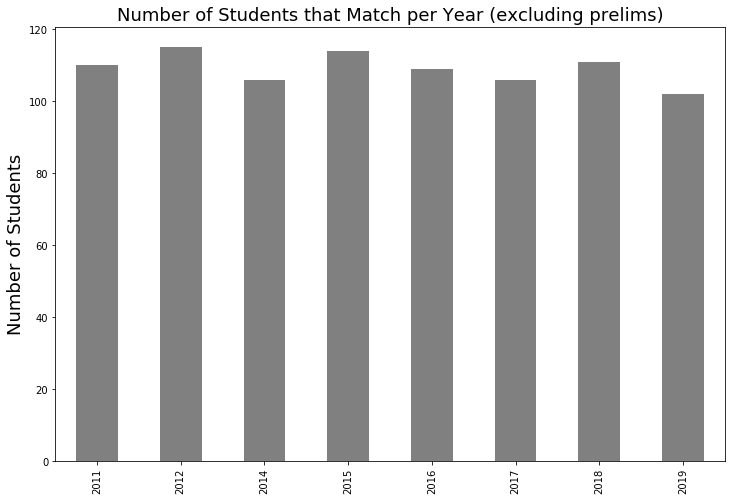

In [8]:
ax = no_prelims.groupby('year').num_students.sum().plot(kind='bar', color = 'grey', figsize = (12,8))
ax.set_xlabel('')
ax.set_ylabel('Number of Students', fontsize = 18)
ax.set_title('Number of Students that Match per Year (excluding prelims)', fontsize = 18)

## 2. Number of students that match into each specialty

### Some epecialties are certainly represented more than others, and this is likely why the average number of students matched per specialty is only 5.

In [9]:
specialty_counts = df.groupby(df.specialty).num_students.sum()

Text(0.5, 1.0, 'Total matched student counts 2011,2012, and 2014-2019')

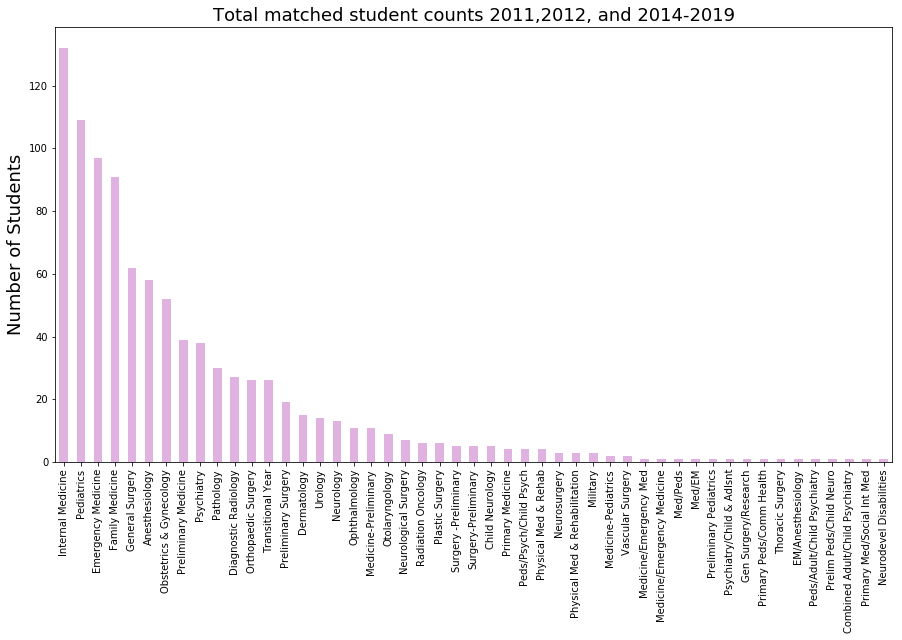

In [10]:
ax = specialty_counts.sort_values(ascending=False).plot(kind='bar', color=(0.8, 0.5, 0.8, 0.6), rot=90, figsize=(15,8))

ax.set_xlabel('')
ax.set_ylabel('Number of Students', fontsize = 18)
s = 'Total matched student counts 2011,2012, and 2014-2019'
ax.set_title(s, fontsize=18)



## Change in number of matching students for strongly represented specialties over time.

In [11]:
#Groupby specialty and year, then sum the number of students
grouped_df = df.groupby(['specialty','year'], as_index=False).num_students.sum()
grouped_df.set_index('specialty', inplace=True)
grouped_df.head()

,year,num_students
specialty,,
Anesthesiology,2011,7
Anesthesiology,2012,9
Anesthesiology,2014,8
Anesthesiology,2015,5
Anesthesiology,2016,7


In [12]:
#generate dataframe for parallel_plot with goal of columns as years and index as specialties
parallel_data = pd.DataFrame( index = [
    'Internal Medicine','Pediatrics','Emergency Medicine','Family Medicine', 
    'General Surgery','Anesthesiology','Obstetrics & Gynecology','Psychiatry',
    'Diagnostic Radiology','Orthopaedic Surgery','Dermatology',
    'Urology','Neurology'] )

for year in [2011,2012,2014,2015,2016,2017,2018,2019]:
    parallel_data[year] = grouped_df[grouped_df.year == year].iloc[:,1]
parallel_data.fillna(0, inplace=True)
parallel_data

,2011,2012,2014,2015,2016,2017,2018,2019
Internal Medicine,14.0,17.0,20,15,16,14,21,15.0
Pediatrics,14.0,17.0,16,12,14,11,14,11.0
Emergency Medicine,18.0,11.0,14,13,13,9,7,12.0
Family Medicine,5.0,14.0,6,17,8,11,17,13.0
General Surgery,11.0,7.0,9,13,2,9,11,0.0
Anesthesiology,7.0,9.0,8,5,7,9,9,4.0
Obstetrics & Gynecology,5.0,8.0,4,5,10,10,4,6.0
Psychiatry,8.0,1.0,6,3,7,2,5,6.0
Diagnostic Radiology,4.0,5.0,2,1,3,3,4,5.0
Orthopaedic Surgery,4.0,2.0,2,5,2,5,2,4.0


In [13]:
parallel_data['specialty'] = parallel_data.index

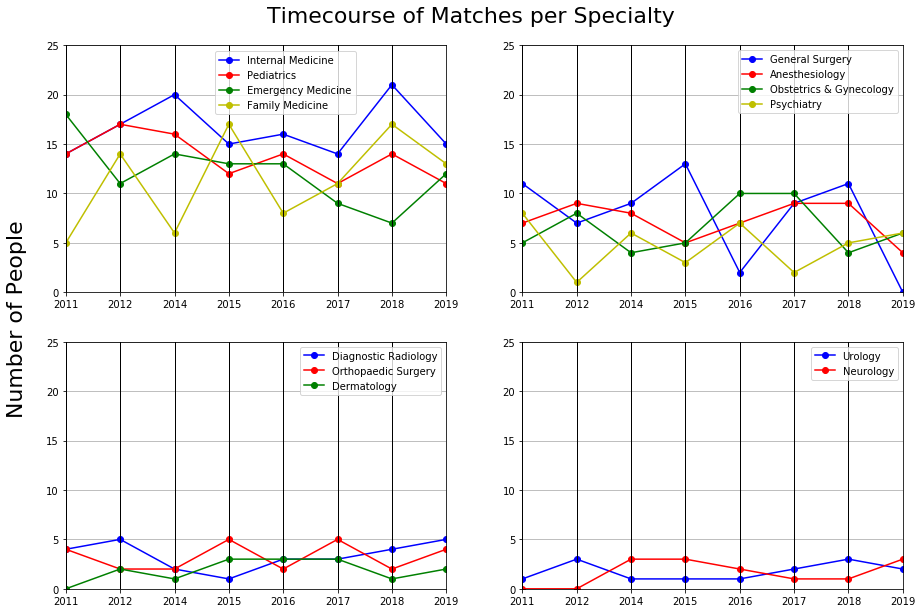

In [14]:
#these will be the specialties evaluated in each subplot
cols = ['Internal Medicine','Pediatrics','Emergency Medicine','Family Medicine']
cols2 = ['General Surgery','Anesthesiology','Obstetrics & Gynecology','Psychiatry']
cols3 = ['Diagnostic Radiology','Orthopaedic Surgery','Dermatology']
cols4 = ['Urology','Neurology']


#line colors
my_colors = list(islice(cycle(['b','r','g','y','k']), None, len(parallel_data)))

#make 2x2 subplots
fig, axes = plt.subplots(2,2, figsize=(15,10))

#Add title and y axis label
fig.text(0.08, 0.5, 'Number of People', ha='center', va='center', rotation='vertical', fontsize=22)
fig.text(0.5, 0.92, 'Timecourse of Matches per Specialty', ha='center', va='center', fontsize=22)

#Make plots
ax1 = parallel_coordinates(parallel_data.loc[cols],'specialty', color=my_colors, marker='o', ax=axes[0][0])
ax1.legend(bbox_to_anchor=(0.38, 0.7)) #moves legend in 0x0 subplot keep it from obscuring data points
ax2 = parallel_coordinates(parallel_data.loc[cols2],'specialty', color=my_colors, marker='o', ax=axes[0][1])
ax3 = parallel_coordinates(parallel_data.loc[cols3],'specialty', color=my_colors, marker='o', ax=axes[1][0])
ax4 = parallel_coordinates(parallel_data.loc[cols4],'specialty', color=my_colors, marker='o', ax=axes[1][1])

#normalizes y axis
for x in [ax1,ax2,ax3,ax4]:
    x.set_ylim([0,25])
    

### The medium sizes specialties (radiology, ortho, derm, uro, neuro) seem to have a stable match rate. 

### There are two years (2016 and 2019) where basically nobody went into surgery, I wonder if there is a reason for that?!?

### Emergency medicine was down trending untill this year! 

### Famliy medicine fluctuates a lot between years. 

### There is a subtle steady decline in students matching into pediatrics.